Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [337]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [314]:
Npx = 2 # Number of plaquette in each dimension
Npy = 4
model = site.SitesOBC(Npx, Npy)

In [318]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nysites)
print(model.partition)

Number of sites: 28
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
5
6
5
['A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B'
 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B']


In [316]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]]


In [284]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
(0, 1)


In [232]:
9 % 2

1

In [209]:
xx_bond, yy_bond, zz_bond = model.get_bonds()

first row
id 0 idx 0 idy 0
first row
id 1 idx 1 idy 0
first row
id 2 idx 2 idy 0
first row
id 3 idx 3 idy 0
first row
id 4 idx 4 idy 0
odd row
id 5 idx 0 idy 1
odd row
id 6 idx 1 idy 1
odd row
id 7 idx 2 idy 1
odd row
id 8 idx 3 idy 1
odd row
id 9 idx 4 idy 1
odd row
id 10 idx 5 idy 1
even row
id 11 idx 0 idy 2
even row
id 12 idx 1 idy 2
even row
id 13 idx 2 idy 2
even row
id 14 idx 3 idy 2
even row
id 15 idx 4 idy 2
even row
id 16 idx 5 idy 2
odd row
id 17 idx 0 idy 3
odd row
id 18 idx 1 idy 3
odd row
id 19 idx 2 idy 3
odd row
id 20 idx 3 idy 3
odd row
id 21 idx 4 idy 3
odd row
id 22 idx 5 idy 3
last row
id 23 idx 0 idy 4
last row
id 24 idx 1 idy 4
last row
id 25 idx 2 idy 4
last row
id 26 idx 3 idy 4


In [210]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 6  7]
 [ 8  9]
 [11 12]
 [13 14]
 [15 16]
 [18 19]
 [20 21]
 [24 25]
 [26 27]]
yy_bond:  [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [12 13]
 [14 15]
 [17 18]
 [19 20]
 [21 22]
 [23 24]
 [25 26]]
zz_bond:  [[ 0  5]
 [ 2  7]
 [ 4  9]
 [ 6 12]
 [ 8 14]
 [10 16]
 [11 17]
 [13 19]
 [15 21]
 [18 23]
 [20 25]
 [22 27]]


In [323]:
    def plot_honeycomb(model):
        coords = model.get_coordinates()
        xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
        
        plt.figure(figsize=(12, 12))
        # Plot sites
        plt.scatter(coords[:, 0], coords[:, 1], color='k', zorder=3)

        # Plot bonds
        for bond in xx_bondlist:
            i, j = bond
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'r-', label='xx' if bond == xx_bondlist[0] else "", lw=2)
        for bond in yy_bondlist:
            i, j = bond
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'b-', label='yy' if bond == yy_bondlist[0] else "", lw=2)
        for bond in zz_bondlist:
            i, j = bond
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'g-', label='zz' if bond == zz_bondlist[0] else "", lw=2)

        plt.axis('equal')
        plt.axis('off')
        # Add legend only once per bond type
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()

id 0 idx 0 idy 0
sublattice A
x 0.0
y -0.0
x 0.0 y -0.0
id 1 idx 1 idy 0
sublattice B
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
sublattice A
x 1.7320508075688772
y -0.0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
sublattice B
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
sublattice A
x 3.4641016151377544
y -0.0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
sublattice B
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
sublattice A
x 5.196152422706632
y -0.0
x 5.196152422706632 y -0.0
id 7 idx 7 idy 0
sublattice B
x 6.06217782649107 y 0.5
id 8 idx 8 idy 0
sublattice A
x 6.928203230275509
y -0.0
x 6.928203230275509 y -0.0
id 9 idx 9 idy 0
sublattice B
x 7.794228634059947 y 0.5
id 10 idx 10 idy 0
sublattice A
x 8.660254037844386
y -0.0
x 8.660254037844386 y -0.0
id 11 idx 11 idy 0
sublattice B
x 9.526279441628825 y 0.5
id 12 idx 12 idy 0
sublattice A
x 10.392304845413264
y -0.0
x 10.392304845413264 y -0.0
id 13 idx 13 idy 0
sublattice B
x 11.258330249197702 y 0.5
id 14 idx 14 idy 0
sublattice A
x

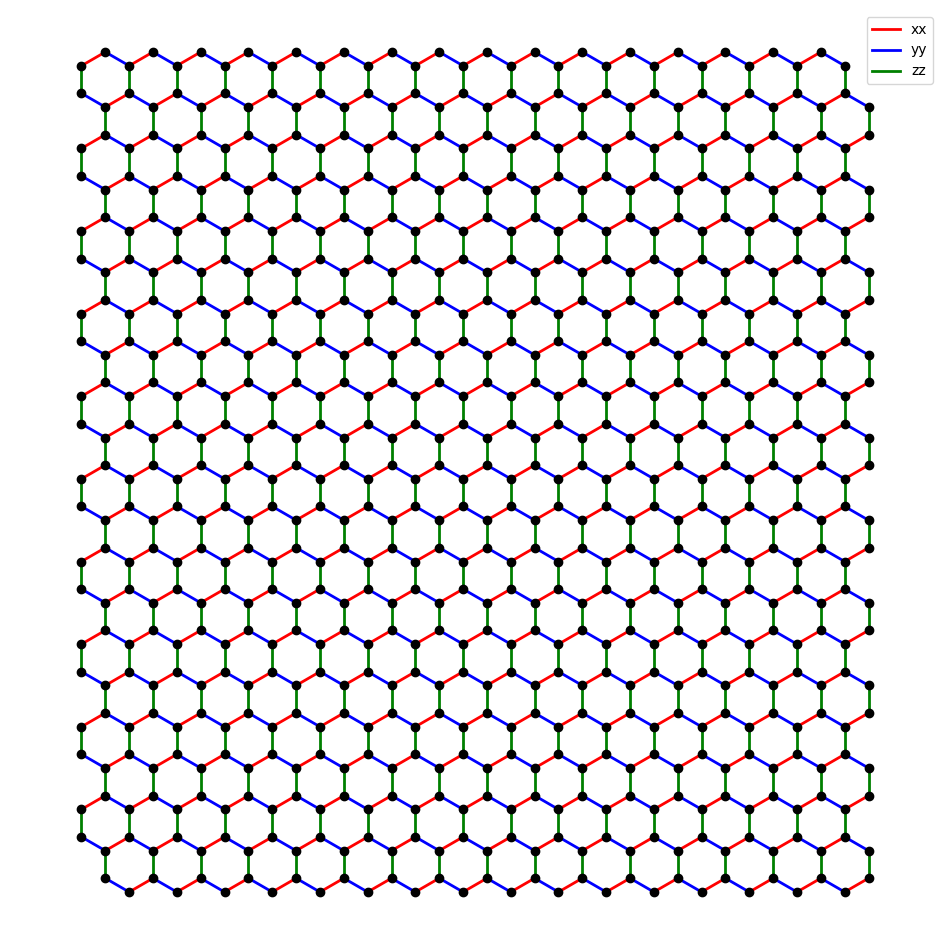

In [331]:
modell = site.SitesOBC(Npx = 16, Npy = 20)
plot_honeycomb(modell)

In [244]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

id 0 idx 0 idy 0
sublattice A
x 0.0
y -0.0
x 0.0 y -0.0
id 1 idx 1 idy 0
sublattice B
x 1.7320508075688772 y 0.5
id 2 idx 2 idy 0
sublattice A
x 1.7320508075688772
y -0.0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
sublattice B
x 3.4641016151377544 y 0.5
id 4 idx 4 idy 0
sublattice A
x 3.4641016151377544
y -0.0
x 3.4641016151377544 y -0.0
id 5 idx 0 idy 1
sublattice B
x 0.0 y -1.0
id 6 idx 1 idy 1
sublattice A
x 1.7320508075688772
y -1.5
x 1.7320508075688772 y -1.5
id 7 idx 2 idy 1
sublattice B
x 1.7320508075688772 y -1.0
id 8 idx 3 idy 1
sublattice A
x 3.4641016151377544
y -1.5
x 3.4641016151377544 y -1.5
id 9 idx 4 idy 1
sublattice B
x 3.4641016151377544 y -1.0
id 10 idx 5 idy 1
sublattice A
x 5.196152422706631
y -1.5
x 5.196152422706631 y -1.5
id 11 idx 0 idy 2
sublattice B
x 0.8660254037844386 y -2.5
id 12 idx 1 idy 2
sublattice A
x 0.8660254037844386
y -3.0
x 0.8660254037844386 y -3.0
id 13 idx 2 idy 2
sublattice B
x 2.598076211353316 y -2.5
id 14 idx 3 idy 2
sublattice A
x 2.598

In [338]:
# Define the Hamiltonian
def hamiltonian(model, Jxx=1.0, Jyy=1.0, Jzz=1.0):
    # H = np.zeros((model.Nsites, model.Nsites), dtype=np.complex128)
    H = sparse.csr_array((np.zeros((model.Nsites, model.Nsites), dtype=np.complex128)))  
    xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
    
    # Add xx bonds
    for i, j in xx_bondlist:
        H[i,j] += 1j * Jxx/2.
        H[j,i] += - 1j * Jxx/2.
    
    # Add yy bonds
    for i, j in yy_bondlist:
        H[i,j] += 1j * Jyy/2.
        H[j,i] += - 1j * Jyy/2.
    
    # Add zz bonds
    for i, j in zz_bondlist:
        H[i,j] += 1j * Jzz/2.
        H[j,i] += - 1j * Jzz/2.
    
    return H

In [339]:
H = hamiltonian(model)
print("Hamiltonian matrix:\n", H)

first row
id 0 idx 0 idy 0
first row
id 1 idx 1 idy 0
first row
id 2 idx 2 idy 0
first row
id 3 idx 3 idy 0
first row
id 4 idx 4 idy 0
odd row
id 5 idx 0 idy 1
odd row
id 6 idx 1 idy 1
odd row
id 7 idx 2 idy 1
odd row
id 8 idx 3 idy 1
odd row
id 9 idx 4 idy 1
odd row
id 10 idx 5 idy 1
even row
id 11 idx 0 idy 2
even row
id 12 idx 1 idy 2
even row
id 13 idx 2 idy 2
even row
id 14 idx 3 idy 2
even row
id 15 idx 4 idy 2
even row
id 16 idx 5 idy 2
odd row
id 17 idx 0 idy 3
odd row
id 18 idx 1 idy 3
odd row
id 19 idx 2 idy 3
odd row
id 20 idx 3 idy 3
odd row
id 21 idx 4 idy 3
odd row
id 22 idx 5 idy 3
last row
id 23 idx 0 idy 4
last row
id 24 idx 1 idy 4
last row
id 25 idx 2 idy 4
last row
id 26 idx 3 idy 4
Hamiltonian matrix:
 <Compressed Sparse Row sparse array of dtype 'complex128'
	with 70 stored elements and shape (28, 28)>
  Coords	Values
  (0, 1)	0.5j
  (0, 5)	0.5j
  (1, 0)	-0.5j
  (1, 2)	0.5j
  (2, 1)	-0.5j
  (2, 3)	0.5j
  (2, 7)	0.5j
  (3, 2)	-0.5j
  (3, 4)	0.5j
  (4, 3)	-0.5j
  (4

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_array is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
